## XGBOOST MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('PJMW_MW_Hourly.xlsx')
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077
1,2002-12-31 02:00:00,4939
2,2002-12-31 03:00:00,4885
3,2002-12-31 04:00:00,4857
4,2002-12-31 05:00:00,4930


In [3]:
df.set_index('Datetime', inplace=True)

In [4]:
MW_df = pd.DataFrame(df['PJMW_MW'])
MW_df.head()

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077
2002-12-31 02:00:00,4939
2002-12-31 03:00:00,4885
2002-12-31 04:00:00,4857
2002-12-31 05:00:00,4930


In [5]:
MW_df.sort_values('Datetime')

,PJMW_MW
Datetime,
2002-04-01 01:00:00,4374
2002-04-01 02:00:00,4306
2002-04-01 03:00:00,4322
2002-04-01 04:00:00,4359
2002-04-01 05:00:00,4436
...,...
2018-08-02 20:00:00,6545
2018-08-02 21:00:00,6496
2018-08-02 22:00:00,6325


In [6]:
MW_df = MW_df.sort_values('Datetime')


In [7]:
MW_df

,PJMW_MW
Datetime,
2002-04-01 01:00:00,4374
2002-04-01 02:00:00,4306
2002-04-01 03:00:00,4322
2002-04-01 04:00:00,4359
2002-04-01 05:00:00,4436
...,...
2018-08-02 20:00:00,6545
2018-08-02 21:00:00,6496
2018-08-02 22:00:00,6325


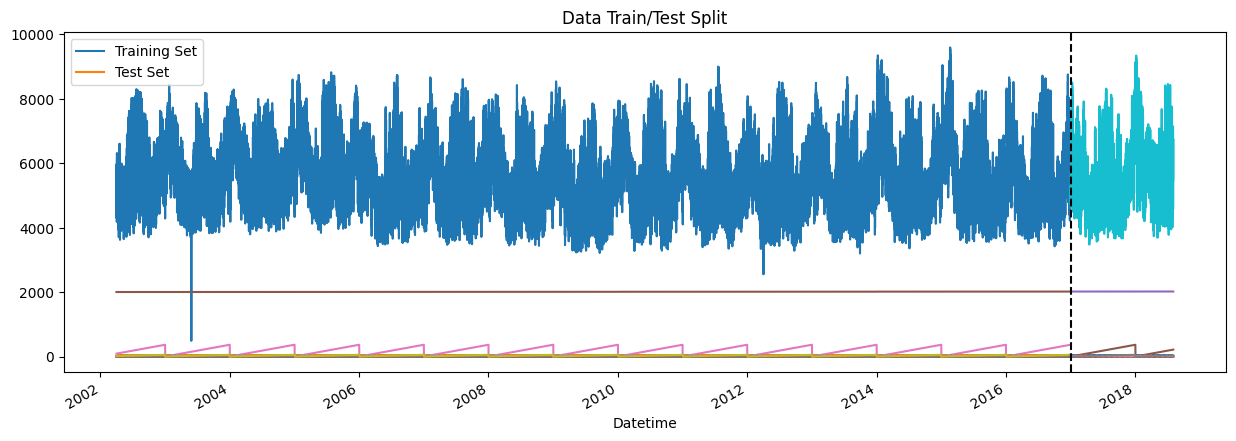

In [15]:
train = MW_df.loc[MW_df.index < '01-01-2017']
test =MW_df.loc[MW_df.index >= '01-01-2017']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [16]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    MW_df['hour'] = MW_df.index.hour
    MW_df['dayofweek'] = MW_df.index.dayofweek
    MW_df['quarter'] = MW_df.index.quarter
    MW_df['month'] = MW_df.index.month
    MW_df['year'] = MW_df.index.year
    MW_df['dayofyear'] =MW_df.index.dayofyear
    MW_df['dayofmonth'] = MW_df.index.day
    MW_df['weekofyear'] = MW_df.index.isocalendar().week
    return df

df = create_features(MW_df)

In [17]:
MW_df

,PJMW_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-04-01 01:00:00,4374,1,0,2,4,2002,91,1,14
2002-04-01 02:00:00,4306,2,0,2,4,2002,91,1,14
2002-04-01 03:00:00,4322,3,0,2,4,2002,91,1,14
2002-04-01 04:00:00,4359,4,0,2,4,2002,91,1,14
2002-04-01 05:00:00,4436,5,0,2,4,2002,91,1,14
...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,6545,20,3,3,8,2018,214,2,31
2018-08-02 21:00:00,6496,21,3,3,8,2018,214,2,31
2018-08-02 22:00:00,6325,22,3,3,8,2018,214,2,31


In [19]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJMW_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [21]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[11:13:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5628.04233	validation_1-rmse:5656.77220
[100]	validation_0-rmse:2157.67039	validation_1-rmse:2171.47811
[200]	validation_0-rmse:982.00791	validation_1-rmse:1036.61790
[300]	validation_0-rmse:652.52541	validation_1-rmse:760.99178
[400]	validation_0-rmse:568.58464	validation_1-rmse:706.47670
[500]	validation_0-rmse:542.04614	validation_1-rmse:697.36130
[600]	validation_0-rmse:527.98187	validation_1-rmse:695.40516
[700]	validation_0-rmse:518.70068	validation_1-rmse:694.49174
[800]	validation_0-rmse:511.72273	validation_1-rmse:691.79912
[889]	validation_0-rmse:505.05124	validation_1-rmse:691.70820


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

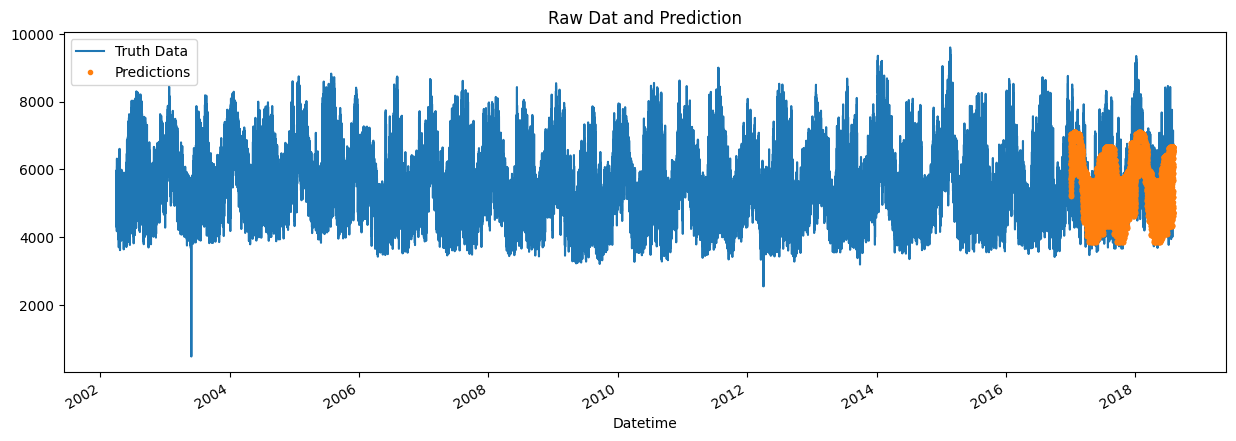

In [23]:
test['pred'] = reg.predict(X_test)
df = MW_df.merge(test[['pred']], how='left', left_index=True, right_index=True)
ax = MW_df[['PJMW_MW']].plot(figsize=(15, 5))
df['pred'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [27]:
score = np.sqrt(mean_squared_error(test['PJMW_MW'], test['pred']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 690.08


In [28]:
test['error'] = np.abs(test[TARGET] - test['pred'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2018-01-06    2333.359721
2017-12-31    2290.906637
2018-01-05    2174.541585
2017-12-28    2103.494141
2018-01-07    1960.879415
2017-12-29    1855.771342
2018-01-01    1764.644450
2017-12-30    1733.168925
2017-03-15    1700.467753
2017-02-24    1658.042013
Name: error, dtype: float64